Import pandas, numpy

In [1]:
import numpy as np
import pandas as pd

# Importing the Fremont Bridge biking data into a dataframe.

Donwload Fremont Bridge biking data from https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k.

In [49]:
!curl -o fre_bri_bikes.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15726    0 15726    0     0   6330      0 --:--:--  0:00:02 --:--:--  6330
100  207k    0  207k    0     0  79016      0 --:--:--  0:00:02 --:--:-- 79016
100 1055k    0 1055k    0     0   289k      0 --:--:--  0:00:03 --:--:--  289k
100 1474k    0 1474k    0     0   350k      0 --:--:--  0:00:04 --:--:--  350k


Convert the csv into a dataframe.

In [50]:
df = pd.read_csv('fre_bri_bikes.csv')
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


## Let's manipulate the dataframe.

Add third column of total bikes on the bridge.

In [52]:
df['Fremont Bridge Total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Fremont Bridge Total
0,10/03/2012 12:00:00 AM,9.0,4.0,13.0
1,10/03/2012 01:00:00 AM,6.0,4.0,10.0
2,10/03/2012 02:00:00 AM,1.0,1.0,2.0
3,10/03/2012 03:00:00 AM,3.0,2.0,5.0
4,10/03/2012 04:00:00 AM,1.0,6.0,7.0


Convert the 'Date' series to a datetime type and add new columns 'Hour' and 'Year'.

In [53]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Year'] = df['Date'].dt.year
df['Day of the Week'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month


Create a dataframe with a subset of data from the year 2016.

In [54]:
df_2016 = df[df['Year'] == 2016]
df_2016.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Fremont Bridge Total,Hour,Year,Day of the Week,Month
28440,2016-01-01 00:00:00,9.0,9.0,18.0,0,2016,4,1
28441,2016-01-01 01:00:00,12.0,3.0,15.0,1,2016,4,1
28442,2016-01-01 02:00:00,5.0,6.0,11.0,2,2016,4,1
28443,2016-01-01 03:00:00,6.0,1.0,7.0,3,2016,4,1
28444,2016-01-01 04:00:00,2.0,0.0,2.0,4,2016,4,1


# Plotting

Plot total counts versus hour of the day. 

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

Average the data per hour

In [37]:
df_2016_hourave = df_2016[['Hour', 'Fremont Bridge Total']].groupby(['Hour']).mean()

      Fremont Bridge Total
Hour                      
0                10.683060
1                 5.532787
2                 3.465753
3                 2.133880
4                 6.120219
5                27.743169
6                95.306011
7               244.874317
8               331.797814
9               186.792350
10               95.234973
11               81.308743
12               86.377049
13               91.043716
14               99.483607
15              131.426230
16              226.333333
17              399.032787
18              262.721311
19              127.125683
20               73.841530
21               46.450820
22               30.450820
23               19.073770
<class 'pandas.core.frame.DataFrame'>


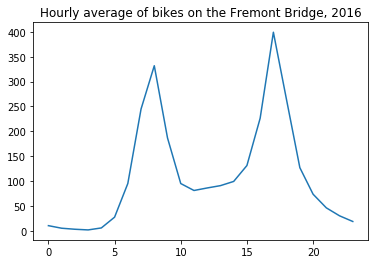

In [56]:
plt.plot(df_2016_hourave)
plt.title('Hourly average of bikes on the Fremont Bridge, 2016')
plt.show()

Which hour of the day was the busiest on average in 2016?

In [57]:
busiest_hour = df_2016_hourave[df_2016_hourave['Fremont Bridge Total']==df_2016_hourave['Fremont Bridge Total'].max()]
busiest_hour

,Fremont Bridge Total
Hour,
17,399.032787


## Some extra stuff

In [62]:
df_2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Fremont Bridge Total,Hour,Year,Day of the Week,Month
28440,2016-01-01 00:00:00,9.0,9.0,18.0,0,2016,4,1
28441,2016-01-01 01:00:00,12.0,3.0,15.0,1,2016,4,1
28442,2016-01-01 02:00:00,5.0,6.0,11.0,2,2016,4,1
28443,2016-01-01 03:00:00,6.0,1.0,7.0,3,2016,4,1
28444,2016-01-01 04:00:00,2.0,0.0,2.0,4,2016,4,1


In [75]:
df_day = df_2016[['Hour', 'Fremont Bridge Total', 'Day of the Week']]
df_day.head(5)

,Hour,Fremont Bridge Total,Day of the Week
28440,0,18.0,4
28441,1,15.0,4
28442,2,11.0,4
28443,3,7.0,4
28444,4,2.0,4


Make a weekday dataframe

In [110]:
df_weekday = df_day[df_day['Day of the Week'] > 0]
df_weekday = df_weekday[df_weekday['Day of the Week'] < 6]

Group and average by hours

In [111]:
df_wd_hours = df_weekday[['Hour', 'Fremont Bridge Total']].groupby('Hour').mean()

In [118]:
df_day.head(5)

,Hour,Fremont Bridge Total,Day of the Week
28440,0,18.0,4
28441,1,15.0,4
28442,2,11.0,4
28443,3,7.0,4
28444,4,2.0,4


Do the same for weekend

In [113]:
df_saturday = df_day[df_day['Day of the Week'] == 6]
df_saturday.head(240)
df_sat_hours = df_saturday[['Hour', 'Fremont Bridge Total']].groupby('Hour').mean()

In [119]:
df_sunday = df_day[df_day['Day of the Week'] == 5]
df_sun_hours = df_sunday[['Hour', 'Fremont Bridge Total']].groupby('Hour').mean()

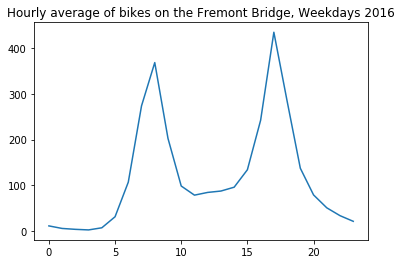

In [120]:
plt.plot(df_wd_hours)
plt.title('Hourly average of bikes on the Fremont Bridge, Weekdays 2016')
plt.show()

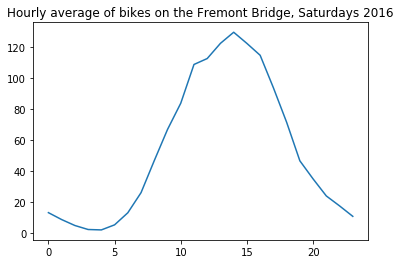

In [121]:
plt.plot(df_sat_hours)
plt.title('Hourly average of bikes on the Fremont Bridge, Saturdays 2016')
plt.show()

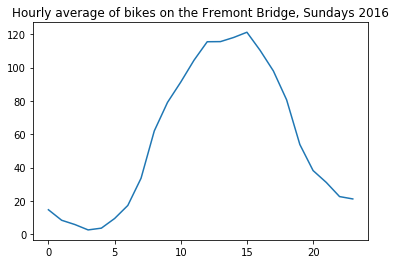

In [122]:
plt.plot(df_sun_hours)
plt.title('Hourly average of bikes on the Fremont Bridge, Sundays 2016')
plt.show()